In [1]:
# !pip install hypernetx
import pandas as pd
import pickle

`We transformed the proteins (node ids) into integers to compute volume densest subhypergraphs (in c++).
vid_to_genename.map => maps the integer node ids (integer) to protein names (string). 
gene_to_vidmap.map => maps the protein names (string) to node ids integer
`

In [209]:
prefix = '../data/datasets/protein/'
vid_to_name_path = prefix+'vid_to_genename.map'
name_to_vid_path = prefix+'gene_to_vidmap.map'
humancomplexcsv = prefix+'allcomplexes.csv'
human_hyp =  '../data/datasets/real/humancomplexes.hyp'
human_complexids = prefix + 'humancomplexes_complexIDs.txt' # Contains for each line/hyperedge in humancomplexes.hyp file \
                                                            # their corresponding id in allcomplexes.csv

`Some utility functions`

In [165]:
# load_hg_ascsv(human_hyp)

In [10]:
def load_dict(fname = 'tmp.pickle'):
    with open(fname, 'rb') as handle:
        b = pickle.load(handle)
        return b
def load_hg_ascsv(name):
    # From the .hyp file construct list of hyperedges
    _list = []
    with open(name,'r') as f:
        for line in f:
            e = [int(i) for i in line.strip().split(',')]
            _list.append(e)
    return _list
def loadhypergraph(hypfile,edge_idfile,vid_togeneMap = vid_to_name_path):
    """
    Load .hyp file, look up for each hyperedge in .hyp file, their corresponding id in complexIDS file,
    Then for each hyperedge, construct their constituent nodes' gene-names from the vid_togeneMap.
    Return list of hyperedges where the nodes in each hyperedge are gene names. key in the returned dictionary is original complex id.
    """
    _dict = {}
    _idlist = []
    _map = load_dict(vid_to_name_path)
    with open(edge_idfile,'r') as f:
        _idlist = [int(_id.strip()) for _id in f]
    
    with open(hypfile,'r') as f:
        j = 0
        for edge in f:
            e = [_map[int(i)] for i in edge.strip().split(',')]
            _dict[_idlist[j]] = e
            j+=1
    return _dict
def retrieve_list_gene_name(lst_integer_id, vid_togeneMap = vid_to_name_path):
    _map = load_dict(vid_togeneMap)
    _tmp = []
    for integer_id in lst_integer_id:
        if integer_id not in _map:
            return None
        else:
            _tmp.append(_map[integer_id])
    return _tmp
def retrieve_stronglyinduced_complexes(lst_integer_id,human_hg):
    protein_complex_ids = []
    for key,value in human_hg.items():
        flag = True
        for u in value:
            if u not in lst_integer_id:
                flag = False
                break
        if flag:
            protein_complex_ids.append(key)
    return protein_complex_ids

`Load the human protein complexes csv curated from CORUM`

In [11]:
human_df = pd.read_csv(humancomplexcsv,sep=',')
human_df.head()

,Unnamed: 0,ComplexID,ComplexName,Organism,Synonyms,Cell line,subunits(UniProt IDs),subunits(Entrez IDs),Protein complex purification method,GO ID,...,FunCat ID,FunCat description,subunits(Gene name),Subunits comment,PubMed ID,Complex comment,Disease comment,SWISSPROT organism,subunits(Gene name syn),subunits(Protein name)
0,0,1,BCL6-HDAC4 complex,Human,None,None,P41182;P56524,604;9759,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC4,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0288,B-cell lymphoma 6 protein;Histone deacetylase 4
1,1,2,BCL6-HDAC5 complex,Human,None,None,P41182;Q9UQL6,604;10014,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC5,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;KIAA0600,B-cell lymphoma 6 protein;Histone deacetylase 5
2,2,3,BCL6-HDAC7 complex,Human,None,None,P41182;Q8WUI4,604;51564,MI:0007-anti tag coimmunoprecipitation,GO:0006265;GO:0045892;GO:0051276;GO:0030183;GO...,...,10.01.09.05;11.02.03.04.03;42.10.03;43.03.07.0...,DNA conformation modification (e.g. chromatin)...,BCL6;HDAC7,None,11929873,Transcriptional repression by BCL6 is thought ...,None,Homo sapiens (Human);Homo sapiens (Human),BCL5 LAZ3 ZBTB27 ZNF51;HDAC7A,B-cell lymphoma 6 protein;Histone deacetylase 7
3,3,4,Multisubunit ACTR coactivator complex,Human,None,None,Q09472;Q92793;Q92831;Q9Y6Q9,2033;1387;8850;8202,MI:0004-affinity chromatography technologies;M...,GO:0045893;GO:0023052;GO:0005634,...,11.02.03.04.01;30.01;70.10,transcription activation;cellular signalling;n...,EP300;CREBBP;KAT2B;NCOA3,None,9267036,Cofactor ACTR binds directly nuclear receptors...,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,"P300;CBP;PCAF;AIB1, BHLHE42, RAC3, TRAM1, ACTR",Histone acetyltransferase p300;CREB-binding pr...
4,5,10,Condensin I complex,Human,13S condensin complex,None,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,10592;23397;9918;64151;10051,MI:0004-affinity chromatography technologies;M...,GO:0000279;GO:0007067;GO:0030261;GO:0007059;GO...,...,10.03.01.01.11;10.03.04.03;10.03.04.05;42.10.0...,M phase;chromosome condensation;chromosome seg...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,None,11136719,None,None,Homo sapiens (Human);Homo sapiens (Human);Homo...,CAPE SMC2L1;BRRN BRRN1 CAPH KIAA0074;CAPD2 CNA...,Structural maintenance of chromosomes protein ...


`Plot core distribution comparison among different methods`

`
Load human protein complex hypergraph as a dict
humancomplexes.hyp => hypergraph of protein complexes
humancomplexes_complexIDs.txt => name of the protein complexes
`

In [15]:
vid_to_genename_map = load_dict(vid_to_name_path)
gene_to_vidmap = load_dict(name_to_vid_path)
human_hg = loadhypergraph(human_hyp, human_complexids, vid_to_name_path)

In [172]:
# human_hg

`Load the nodes in the volume densest subhypergraph and extract induced subhypergraph.
This subhypergraph is the volume densest subhypergraph that we analyze`

In [210]:
vol_d = prefix+'/density/protein_nbr.csv'
vol_dhg = load_hg_ascsv(vol_d) # List of hyperedges
nodes_volD = set() # Set of nodes in the vol.dens. subhg
for e in vol_dhg:
    for u in e:
        nodes_volD.add(u)

coreprotein_names = retrieve_list_gene_name(nodes_volD) # extract protein names associated to the nodes in vol.dens.subhg
sub_complexes_volD = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg) # extract complexes/sub-hyperedges given names of proteins.
print('volume-Densest sub-protein complexes: ')
print(sub_complexes_volD)
# print(coreprotein_names)
print(nodes_volD)

<class 'list'>
volume-Densest sub-protein complexes: 
[351, 763, 770, 774, 775, 1195, 1261, 1734, 1743, 2833, 6072, 6073, 6160]
{3603, 21, 545, 1574, 1068, 2553, 2616, 2617, 2618, 2619, 2621, 3133, 2623, 78, 2166, 631, 2681, 3198, 642, 146, 3219, 672, 3234, 1699, 3235, 3237, 1702, 2215, 3239, 3238, 3236, 1703, 2476, 1700, 1710, 688, 689, 2478, 1721, 2241, 2990, 2483, 720, 723, 727, 728, 729, 731, 732, 742, 746, 747, 750, 751, 752, 2999, 3312, 2816, 778, 270, 1819, 2357, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 3394, 2883, 1860, 3397, 3398, 3399, 1353, 335, 336, 848, 341, 1698, 353, 2414, 1392, 2416, 2418, 880, 2419, 2421, 2417, 1399, 3449, 2939, 2446, 2968, 2969, 2986, 2475, 2988, 2477, 430, 2479, 2480, 2992, 2482, 2993, 2996, 2997, 2994, 2995, 2481, 3001, 3002, 3003, 1980, 2998, 3006, 447, 3008, 3000, 449, 1473, 3517, 462, 3031, 3547, 3551, 2021, 2022, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 502}


In [13]:
human_df[(human_df.ComplexID.isin(sub_complexes_volD))][['ComplexID','ComplexName','Disease comment']].head(15)

,ComplexID,ComplexName,Disease comment
165,351,Spliceosome,None
335,763,Y14-Magoh complex,None
337,770,TREX complex,None
340,774,THO complex,None
341,775,CBC complex (cap binding complex),None
554,1195,Exon junction complex (mRNA splicing-dependent),None
592,1261,SRm160/300 complex,None
676,1734,SF3A1-SF3A2-SF3A3 complex,None
678,1743,(E.F.G) complex,None
1039,2833,SRm160-SRm300 complex,None


`Extract protein complex names (hyperedge ids) in the volume densest subhypergraph `

In [160]:
v_densestE = []
for e in vol_dhg:
    new_e = retrieve_list_gene_name(e)
    v_densestE.append(new_e)
# print(v_densestE)

In [263]:
# vol_dhg
# sub_complexes_volD

[351, 763, 770, 774, 775, 1195, 1261, 1734, 1743, 2833, 6072, 6073, 6160]

`Plot the densest subhypergraph`

13


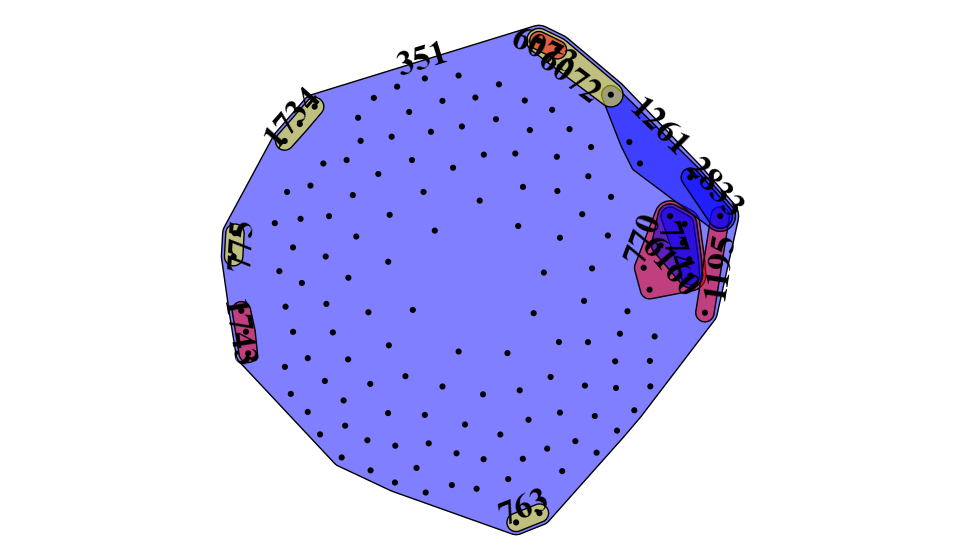

In [163]:
import numpy as np
import sys, os
import random

import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
scenes = {i: v_densestE[i] for i in range(len(v_densestE))}
print(len(scenes))
labels = {}
j = 0
for i,row in human_df[(human_df.ComplexID.isin(sub_complexes_volD))].iterrows():
    labels[j] = row['ComplexID']
    j+=1
# print(labels)
H = hnx.Hypergraph(scenes)

font = {
        'family': 'Times New Roman',
        'weight': 'bold',
        'size': 20
        }
plt.rc('font',**font)
alpha = .5

fig, ax1 = plt.subplots(figsize = (10,6))

edge_d = {'fontsize':25}
hnx.draw(H, ax = ax1,
                 label_alpha=0,
                 edges_kwargs={
                     'facecolors': [(0,0,1,alpha),  (1, 1, 0, alpha), (1,0,0, alpha)],
                     'edgecolors': 'black',
                     'linewidths': 1
                 },
                 nodes_kwargs = {
                     'facecolors': (0,0,0,1)
                },
                layout_kwargs = {'seed': 17},
                with_edge_labels = True, 
                with_node_labels = False,
                node_radius = 0.5,
                edge_labels = labels,
                edge_labels_kwargs = edge_d
        )
plt.tight_layout()
plt.savefig('../fig/protein.pdf')
plt.show()

In [97]:
coref = {
        "kdcore": '../output/core_kdcore_protein.csv',
        "nbr": '../output/core_Peel_protein.csv',
        "deg": '../output/core_naive_deg_protein.csv',
        "clique": '../output/core_clique_protein.csv',
        "bipartite": '../output/core_bipartite_protein.csv'
    }

In [337]:
def read_kdcore():
    corefile =  coref['kdcore']
    C = {}
    maximal_kd = (0,0)
    with open(corefile,'r') as wf:
        for line in wf:
            v,k,d = line.split(",")
            v,k,d = int(v),int(k),int(d)
            if k not in C:
                C[k] = {}
            if d not in C[k]:
                C[k][d] = []
            C[k][d].append(v)
            maximal_kd = (max(maximal_kd[0],k),max(max(C[k].keys()),d))
    # print(maximal_kd)
    return C,maximal_kd
def getkdcore(C,k,d):
    return C[k][d]
def getkdcore2(C,k,d):
    import functools
    _map = load_dict(vid_to_name_path)
    k_set = sorted(functools.reduce(lambda x,y: x+y,C[k].values()))
    # print(len(k_set),' ',len(set(k_set)))
    for u in k_set:
        for _k in range(1,k-1):
            c = C.get(_k,{})
            for dd,v in c.items():
                if u in v and dd>d:
                    print(u,' => ',_map[u],':',_k,dd)
# getkdcore(24,2)
# len(getkdcore(142,1))
C, (mk,md) = read_kdcore()
getkdcore2(C,mk,md)
# getkdcore(C, mk,md)
print(mk,md)

631  =>  CPSF6 : 1 2
631  =>  CPSF6 : 2 2
880  =>  EIF4A3 : 1 2
880  =>  EIF4A3 : 2 2
880  =>  EIF4A3 : 3 2
1721  =>  MAGOH : 1 2
1721  =>  MAGOH : 2 2
1721  =>  MAGOH : 3 2
2166  =>  NUDT21 : 1 2
2166  =>  NUDT21 : 2 2
2623  =>  RBM8A : 1 2
2623  =>  RBM8A : 2 2
2623  =>  RBM8A : 3 2
2995  =>  SNRPB : 1 3
2995  =>  SNRPB : 2 3
2995  =>  SNRPB : 3 3
2995  =>  SNRPB : 4 3
2995  =>  SNRPB : 5 3
2995  =>  SNRPB : 6 2
2995  =>  SNRPB : 7 2
2998  =>  SNRPD1 : 1 3
2998  =>  SNRPD1 : 2 3
2998  =>  SNRPD1 : 3 3
2998  =>  SNRPD1 : 4 3
2998  =>  SNRPD1 : 5 3
2998  =>  SNRPD1 : 6 2
2998  =>  SNRPD1 : 7 2
2999  =>  SNRPD2 : 1 3
2999  =>  SNRPD2 : 2 3
2999  =>  SNRPD2 : 3 3
2999  =>  SNRPD2 : 4 3
2999  =>  SNRPD2 : 5 3
2999  =>  SNRPD2 : 6 2
2999  =>  SNRPD2 : 7 2
3000  =>  SNRPD3 : 1 3
3000  =>  SNRPD3 : 2 3
3000  =>  SNRPD3 : 3 3
3000  =>  SNRPD3 : 4 3
3000  =>  SNRPD3 : 5 3
3000  =>  SNRPD3 : 6 2
3000  =>  SNRPD3 : 7 2
3001  =>  SNRPE : 1 3
3001  =>  SNRPE : 2 3
3001  =>  SNRPE : 3 3
3001  =>  S

In [85]:
# corefile =  '../output/core_Peel_protein.csv'
# C = {}
# maximal_k = 0
# with open(corefile,'r') as wf:
#     for line in wf:
#         v,k = line.split(",")
#         v,k = int(v),int(k)
#         if k not in C:
#             C[k] = []
#         C[k].append(v)
#         maximal_k = max(maximal_k,k)
# print(maximal_k)
# def getkcore(k):
#     core = set()
#     for _k in range(k,maximal_k+1):
#         for v in C[_k]:
#             core.add(v)
#     return core
# len(getkcore(142))

In [323]:
def read_kcore(corefile):
    C = {}
    maximal_k = 0
    with open(corefile,'r') as wf:
        for line in wf:
            v,k = line.split(",")
            v,k = int(v),int(k)
            # print(v,k)
            if k not in C:
                C[k] = []
            C[k].append(v)
            maximal_k = max(maximal_k,k)
    # print(maximal_k)
    return C,maximal_k
def getkcore(C, k,maximal_k):
    core = set()
    for _k in range(k,maximal_k+1):
        for v in C.get(_k,[]):
            # print(v)
            core.add(v)
    return core
def core_protein_complexeIDs(innernodes):
    # getkdcore(C_kd, mk,md)
    coreprotein_names = retrieve_list_gene_name(innernodes) # extract protein names associated to the nodes in vol.dens.subhg
    edges = retrieve_stronglyinduced_complexes(coreprotein_names, human_hg) # extract complexes/hyperedges.
    return sorted(coreprotein_names),edges

# def extract_edges_innercoreforPlot(V_k):
#     hyp = load_hg_ascsv(human_hyp)
#     # Given V_k returns H[V_k]
#     set_V = set(V_k)
#     H_vk = []
#     H_vknames = []
#     for edge in hyp:
#         e = set(edge)
#         if e.issubset(set_V):
#             H_vk.append(edge)
#             H_vknames.append(retrieve_list_gene_name(edge))
#     return H_vk,H_vknames
def get_innerEdges(V_k):
    hyp = load_hg_ascsv(human_hyp)
    set_V = set(V_k)
    H_vk = []
    H_vknames = []
    for edge in hyp:
        # print(edge,set_V)
        e = set(edge)
        if e.issubset(set_V):
            # print(edge)
            new_e = retrieve_list_gene_name(edge)
            H_vk.append(new_e)
            if 'SRSF6' in new_e:
            # if 'TRA2B' in new_e:
            # if 'THOC2' in new_e:
                print(e,' ',new_e)
    return H_vk

In [369]:
C_kd, (mk,md) = read_kdcore()
mk = 1; md = 4
print('in.most |k,d| core |V_kd|:', len(getkdcore(C_kd, mk,md)), ' in.most core#:',(mk,md))
C_n,k_n = read_kcore(coref['nbr'])
print('in.most nbrcore |V_k|: ',len(getkcore(C_n,k_n,k_n)), ' in.most core#:',k_n)
C_d,k_d = read_kcore(coref['deg'])
print('in.most degcore |V_d|:', len(getkcore(C_d,k_d,k_d)), ' in.most core#:',k_d)
C_c,k_c = read_kcore(coref['clique'])
print('in.most clique-core |V_d|:', len(getkcore(C_c,k_c,k_c)), 'in.most core#:',k_c)
C_b,k_b = read_kcore(coref['bipartite'])
print('in.most bipartite-core |V_|:', len(getkcore(C_b,k_b,k_b)), 'in.most core#:',k_b)

in.most |k,d| core |V_kd|: 22  in.most core#: (1, 4)
in.most nbrcore |V_k|:  143  in.most core#: 142
in.most degcore |V_d|: 15  in.most core#: 10
in.most clique-core |V_d|: 143 in.most core#: 142
in.most bipartite-core |V_|: 143 in.most core#: 143


In [326]:
print(C_kd[2].keys())
# sorted(C_kd[1][1],reverse=True)
for _k in range(1,mk):
    c = C_kd[_k]
    # for u in [3312, 3065, 3063]:
    # for u in [3235]:
    for u in [3063]:
        for k,v in c.items():
            if u in v:
                print(u,' => ',_k,k)

dict_keys([1, 2, 3, 4, 9, 10])
3063  =>  1 1
3063  =>  2 1
3063  =>  3 1
3063  =>  4 1
3063  =>  5 1
3063  =>  6 1
3063  =>  7 1
3063  =>  8 1
3063  =>  9 1
3063  =>  10 1
3063  =>  11 1
3063  =>  12 1
3063  =>  13 1
3063  =>  14 1
3063  =>  15 1
3063  =>  16 1
3063  =>  17 1
3063  =>  18 1
3063  =>  19 1
3063  =>  20 1
3063  =>  21 1
3063  =>  22 1
3063  =>  23 1
3063  =>  24 1
3063  =>  25 1
3063  =>  26 1
3063  =>  27 1
3063  =>  28 1
3063  =>  29 1
3063  =>  30 1
3063  =>  31 1
3063  =>  32 1
3063  =>  33 1
3063  =>  34 1
3063  =>  35 1
3063  =>  36 1
3063  =>  37 1
3063  =>  38 1
3063  =>  39 1
3063  =>  40 1
3063  =>  41 1
3063  =>  42 1
3063  =>  43 1
3063  =>  44 1
3063  =>  45 1
3063  =>  46 1
3063  =>  47 1
3063  =>  48 1
3063  =>  49 1
3063  =>  50 1
3063  =>  51 1
3063  =>  52 1
3063  =>  53 1
3063  =>  54 1
3063  =>  55 1
3063  =>  56 1
3063  =>  57 1
3063  =>  58 1
3063  =>  59 1
3063  =>  60 1
3063  =>  61 1
3063  =>  62 1
3063  =>  63 1
3063  =>  64 1
3063  =>  65 1
306

In [328]:
# print(C_kd[2].keys())
# # sorted(C_kd[1][1],reverse=True)
# for u in getkdcore(C_kd, mk,md):
#     for _k in range(1,mk-1):
#         c = C_kd[_k]
#         # for u in [3312, 3065, 3063]:
#         # for u in [3235]:
#         for k,v in c.items():
#             if u in v and k>1:
#                 print(u,' => ',_k,k)

# Retrieve id

In [370]:
V_kd,Ekd_ids = core_protein_complexeIDs(getkdcore(C_kd, mk,md))
V_n,En_ids = core_protein_complexeIDs(getkcore(C_n, k_n,k_n))
V_d,Ed_ids = core_protein_complexeIDs(getkcore(C_d, k_d,k_d))
V_c,Ec_ids = core_protein_complexeIDs(getkcore(C_c, k_c,k_c))
V_b,Eb_ids = core_protein_complexeIDs(getkcore(C_b,k_b,k_b))
print('Nodes in (k,d) in.core => \n', V_kd)
print('Nodes in nbr in.core => \n',V_n)
print('Nodes in deg in.core => \n',V_d)
print('Nodes in clique in.core => \n',V_c)
print('Nodes in bipartite in.core => \n',V_b)

Nodes in (k,d) in.core => 
 ['CCND1', 'CCND3', 'CDK4', 'CDK6', 'CDKN1A', 'CHTF18', 'CHTF8', 'CREBBP', 'DSCC1', 'MLH1', 'MSH2', 'MSH6', 'PCNA', 'PMS2', 'RFC2', 'RFC3', 'RFC4', 'RFC5', 'SKI', 'SMAD2', 'SMAD3', 'SMAD4']
Nodes in nbr in.core => 
 ['ACIN1', 'ALYREF', 'AQR', 'BCAS2', 'BUD13', 'BUD31', 'C19orf43', 'CACTIN', 'CD2BP2', 'CDC40', 'CDC5L', 'CDK12', 'CFAP20', 'CIRBP', 'CPSF6', 'CRNKL1', 'CTNNBL1', 'CWC15', 'CWC22', 'DDX17', 'DDX23', 'DDX39B', 'DDX3X', 'DDX41', 'DDX46', 'DDX5', 'DGCR14', 'DHX15', 'DHX16', 'DHX38', 'DHX8', 'DHX9', 'DNAJC8', 'EFTUD2', 'EIF4A3', 'FNBP3', 'HTATSF1', 'IGF2BP3', 'IK', 'ISY1', 'KIAA1429', 'LSM2', 'LSM3', 'LSM4', 'LSM6', 'LSM7', 'LUC7L3', 'MAGOH', 'MFAP1', 'MOV10', 'MTREX', 'NCBP1', 'NCBP2', 'NUDT21', 'PABPC1', 'PAXBP1', 'PLRG1', 'PPIE', 'PPIH', 'PPIL1', 'PPIL2', 'PPIL3', 'PPM1G', 'PPWD1', 'PRPF18', 'PRPF19', 'PRPF3', 'PRPF31', 'PRPF4', 'PRPF40A', 'PRPF4B', 'PRPF6', 'PRPF8', 'PUF60', 'RBM15', 'RBM17', 'RBM22', 'RBM25', 'RBM39', 'RBM8A', 'RNPS1', 'SART1', 'S

In [354]:
Ekd_ids

[278,
 286,
 290,
 291,
 292,
 312,
 314,
 369,
 374,
 376,
 612,
 613,
 1633,
 1634,
 2199,
 2200,
 2201,
 2797,
 2804,
 2805,
 2834,
 3084,
 3086,
 3087,
 3089,
 3198,
 3199,
 3200,
 3739,
 3740,
 3749,
 3750,
 3753,
 3754,
 3959,
 5100,
 5101]

In [256]:
# len(get_innerEdges(getkcore(C_n, k_n,k_n)))

In [230]:
human_df[(human_df.ComplexID.isin(Ec_ids))][['ComplexID','ComplexName','Disease comment']].head(30)

,ComplexID,ComplexName,Disease comment
165,351,Spliceosome,None
335,763,Y14-Magoh complex,None
337,770,TREX complex,None
340,774,THO complex,None
341,775,CBC complex (cap binding complex),None
554,1195,Exon junction complex (mRNA splicing-dependent),None
592,1261,SRm160/300 complex,None
676,1734,SF3A1-SF3A2-SF3A3 complex,None
678,1743,(E.F.G) complex,None
1039,2833,SRm160-SRm300 complex,None


In [372]:
# human_df[(human_df.ComplexID.isin(Ec_ids))]
ddhf = human_df[(human_df.ComplexID.isin(Ekd_ids))][['ComplexID','ComplexName','Disease comment']]
ddhf.head()
# ddhf[ddhf['Disease comment']!="None"].head(30)

,ComplexID,ComplexName,Disease comment
130,278,RFC core complex,None
136,286,PCNA-MSH2-MSH6 complex,None
138,290,MSH2-MLH1-PMS2-PCNA DNA-repair initiation complex,None
139,291,MSH2-MLH1-PMS2 DNA-repair initiation complex,None
140,292,MutL-alpha complex,None


In [231]:
human_df[(human_df.ComplexID.isin(Ed_ids))][['ComplexID','ComplexName','Disease comment']].head(30)

,ComplexID,ComplexName,Disease comment
656,1612,GNAS-GNB1-GNG2 complex,None
2225,7019,GNAI1-GNB1-GNG2 complex,None
2226,7020,GNAI1-GNB2-GNG2 complex,None
2227,7021,GNAI1-GNB3-GNG2 complex,None
2228,7022,GNAI1-GNB4-GNG2 complex,None
2229,7023,GNAI1-GNB5-GNG2 complex,None
2236,7031,GNAI1-GNB1-GNG4 complex,None
2237,7032,GNAI1-GNB2-GNG4 complex,None
2238,7033,GNAI1-GNB3-GNG4 complex,None
2239,7034,GNAI1-GNB4-GNG4 complex,None


In [226]:
# human_df[(human_df.ComplexID.isin(Ed_ids))][['ComplexID','ComplexName','Disease comment']].head(40)

In [371]:
Ekdnames = get_innerEdges(getkdcore(C_kd, mk,md))
Ennames = get_innerEdges(getkcore(C_n,k_n,k_n))
Ednames = get_innerEdges(getkcore(C_d,k_d,k_d))
Ecnames = get_innerEdges(getkcore(C_c,k_c,k_c))
Ebnames = get_innerEdges(getkcore(C_b,k_b,k_b))

{3603, 21, 545, 1574, 1068, 2553, 2616, 2617, 2618, 2619, 2621, 3133, 2623, 78, 2166, 631, 2681, 3198, 642, 146, 3219, 672, 3234, 1699, 3235, 3237, 1702, 2215, 3239, 3238, 3236, 1703, 2476, 1700, 1710, 688, 689, 2478, 1721, 2241, 2990, 2483, 720, 723, 727, 728, 729, 731, 732, 742, 746, 747, 750, 751, 752, 2999, 3312, 2816, 778, 270, 1819, 2357, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 3394, 2883, 1860, 3397, 3398, 3399, 1353, 335, 336, 848, 341, 1698, 353, 2414, 1392, 2416, 2418, 880, 2419, 2421, 2417, 1399, 3449, 2939, 2446, 2968, 2969, 2986, 2475, 2988, 2477, 430, 2479, 2480, 2992, 2482, 2993, 2996, 2997, 2994, 2995, 2481, 3001, 3002, 3003, 1980, 2998, 3006, 447, 3008, 3000, 449, 1473, 3517, 462, 3031, 3547, 3551, 2021, 2022, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 502}   ['IGF2BP3', 'DDX3X', 'TCERG1', 'U2SURP', 'PPM1G', 'DHX15', 'PRPF4', 'SART1', 'PRPF3', 'PPIH', 'PLRG1', 'ZNF207', 'HTATSF1', 'NUDT21', 'DHX16', 'AQR', 'CDC40', 'PRPF40A', 'SF3B1

In [217]:
# # print('Complexes in (k,d) in.core => \n', Ekdnames)
# # print('Complexes in nbr in.core => \n',Ennames)
# # print('Complexes in deg in.core => \n',Ednames)
# # print('Complexes in clique in.core => \n',Ecnames)
# # print('Complexes in bipartite in.core => \n',Ebnames)
# print('Complexes in (k,d) in.core => \n', Ekd)
# print('Complexes in nbr in.core => \n',En)
# print('Complexes in deg in.core => \n',Ed)
# print('Complexes in clique in.core => \n',Ec)
# print('Complexes in bipartite in.core => \n',Eb)

In [338]:
import numpy as np
import sys, os
import random

import matplotlib.pyplot as plt
import networkx as nx
import hypernetx as hnx
    
def plotcore(listofEdges,Eids):
    v_densestE = listofEdges
    scenes = {i: v_densestE[i] for i in range(len(v_densestE))}
    # print(scenes)
    labels = {}
    j = 0
    for i,row in human_df[(human_df.ComplexID.isin(Eids))].iterrows():
        labels[j] = row['ComplexID']
        j+=1
    # print(labels)
    H = hnx.Hypergraph(scenes)

    font = {
            'family': 'Times New Roman',
            'weight': 'bold',
            'size': 8
            }
    plt.rc('font',**font)
    alpha = .5

    fig, ax1 = plt.subplots(figsize = (12,10))

    edge_d = {'fontsize':13}
    hnx.draw(H, ax = ax1,
                     label_alpha=0,
                     edges_kwargs={
                         'facecolors': [(0,0,1,alpha),  (1, 1, 0, alpha), (1,0,0, alpha)],
                         'edgecolors': 'black',
                         'linewidths': 1
                     },
                     nodes_kwargs = {
                         'facecolors': (0,0,0,1)
                    },
                    layout_kwargs = {'seed': 17},
                    with_edge_labels = True, 
                    with_node_labels = True,
                    node_radius = 0.5,
                    edge_labels = labels,
                    edge_labels_kwargs = edge_d
            )
    plt.tight_layout()
    # plt.savefig('../fig/protein.pdf')
    plt.show()
    plt.close()

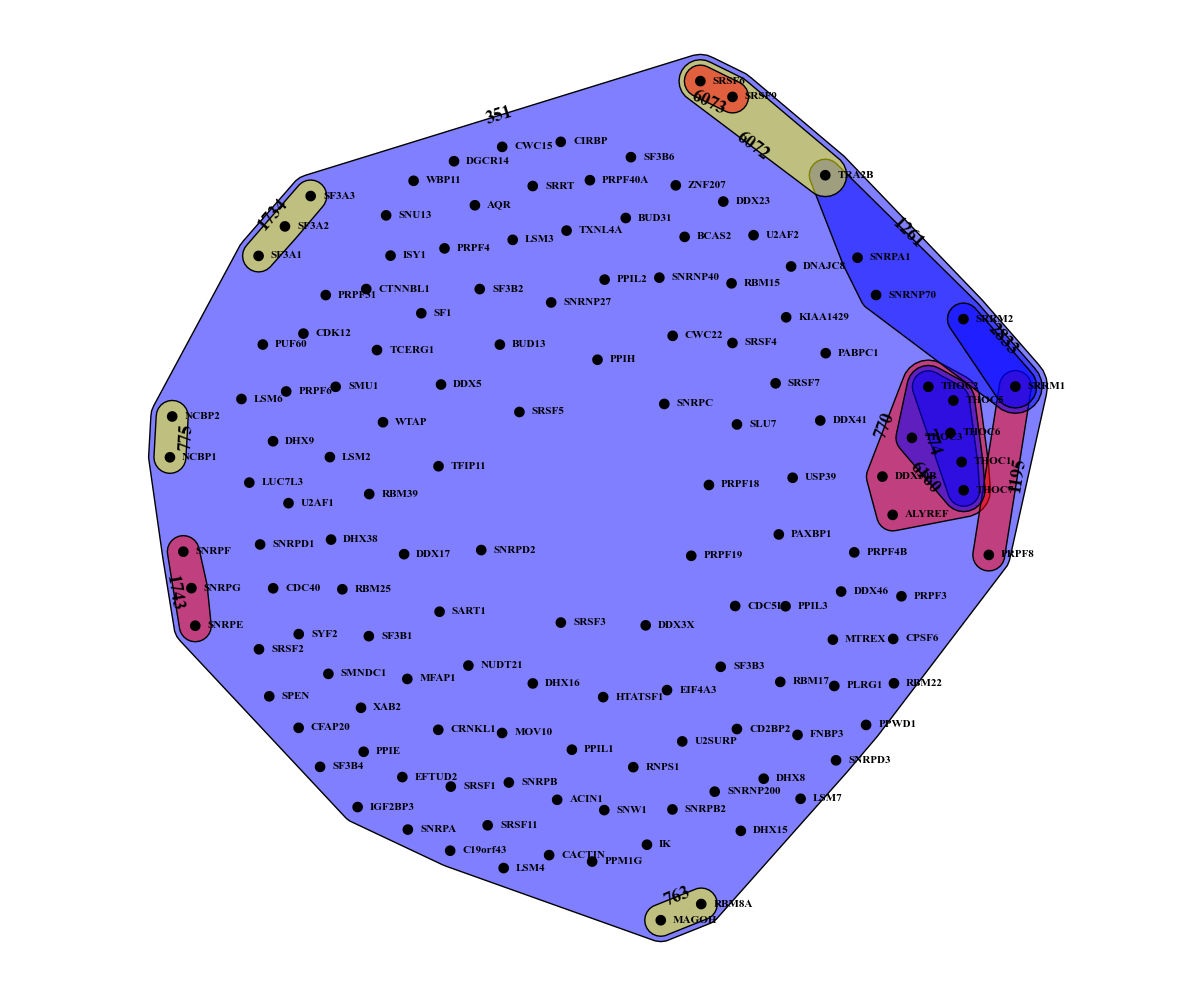

In [339]:
plotcore(Ekdnames,Ekd_ids)
# plotcore(Ednames,Ed_ids)
# plotcore(Ennames,En_ids)

In [303]:
Ekd

[]

In [240]:
def sorkd(algo_name,C, verbose = False):
    _tmp = [[(x,y) for y in C_kd[x]] for x in C_kd.keys()]
    if(verbose):
        print(_tmp)
    distinct_core_numbers = []
    for i in _tmp:
        distinct_core_numbers+= i
    if(algo_name == "kd"):
        distinct_core_numbers.sort(key=lambda x: (x[0], x[1]), reverse=True)
        # print(distinct_core_numbers)
    elif(algo_name == "dk"):
        distinct_core_numbers.sort(key=lambda x: (x[1], x[0]), reverse=True)
        # print(distinct_core_numbers)
    return distinct_core_numbers

In [242]:
kdcore_dk = sorkd('dk',C_kd,verbose = False)
kdcore_kd = sorkd('kd',C_kd,verbose = False)
# kdcore_dk
# kdcore_kd

In [374]:
def kdcoreExpt(k,d):
    C_kd, _ = read_kdcore()
    core = getkdcore(C_kd, k,d)
    V_kd,Ekd_ids = core_protein_complexeIDs(core)
    ddhf = human_df[(human_df.ComplexID.isin(Ekd_ids))][['ComplexID','ComplexName','Disease comment']]
    # print(ddhf.head()
    print(ddhf[ddhf['Disease comment']!="None"].head(30))
    ddhf[ddhf['Disease comment']!="None"].to_csv(str(k)+"_"+str(d)+".csv")
# kdcoreExpt(1,3)

      ComplexID                                        ComplexName  \
25           61                                   Mi2/NuRD complex   
32           71              MRN complex (MRE11-RAD50-NBN complex)   
73          162                                        COG complex   
85          201                                       HUIC complex   
86          202                     BRCA1-RAD50-MRE11-NBS1 complex   
112         238  SWI-SNF chromatin remodeling-related-BRCA1 com...   
513        1142                                        SMN complex   
539        1177                      Polycomb repressive complex 4   
1004       2776                                RAD50-BRCA1 complex   
1024       2814                          BRCA1-HDAC1-HDAC2 complex   
1029       2819                            BRCA1-CtIP-CtBP complex   
1034       2824                                BRCA1-RAD51 complex   
1087       2918          Ku antigen-YY1-alphaMyHC promoter complex   
1192       3118     

In [425]:
out = None
def kdcoreExpt(k,d):
    global out
    C_kd, _ = read_kdcore()
    core = getkdcore(C_kd, k,d)
    V_kd,Ekd_ids = core_protein_complexeIDs(core)
    ddhf = human_df[(human_df.ComplexID.isin(Ekd_ids))][['ComplexID','ComplexName','Disease comment','Complex comment']]
    out = ddhf.head(50)
    human_df[(human_df.ComplexID.isin(Ekd_ids))].to_csv('73.csv')
    # ddhf.to_csv('73.csv')
    ddhf[ddhf['Disease comment']!="None"].head(30)
    ddhf[ddhf['Disease comment']!="None"].to_csv(str(k)+"_"+str(d)+".csv")
kdcoreExpt(7,3)
out

,ComplexID,ComplexName,Disease comment,Complex comment
19,54,SIN3 complex,None,An important event in gene expression is the c...
25,61,Mi2/NuRD complex,"Dermatomyositis, cancer (PMID:9790534)",None
73,162,COG complex,"Deficiencies in COG1, COG7, COG8 cause a novel...",None
134,283,Sin3 complex,None,None
252,596,SIN3-HDAC-SAP30-ARID4 complex,None,RBP1 associates with mSIN3-HDAC complex.
301,710,Brg1-associated complex I,None,None
317,738,SIN3-ING1b complex I,None,SAP30 is a specific component of Sin3 complexe...
318,739,SIN3-ING1b complex II,None,SAP30 is a specific component of Sin3 complexe...
357,803,BRG1-SIN3A-HDAC containing SWI/SNF remodeling ...,None,"The authors provide evidence, that PRMT5, mSin..."
360,807,BRG1-associated complex,None,None


In [380]:
for k in C_kd:
    print("k = ",k)
    dd = [str(d) for d,v in C_kd[k].items()]
    print("d: "+" ".join(dd))

k =  0
d: 1 2 3 4 9 10
k =  1
d: 1 2 3 4 9 10
k =  2
d: 1 2 3 4 9 10
k =  3
d: 1 2 3 4 9 10
k =  4
d: 1 2 3 4 9 10
k =  5
d: 1 2 3 4 9 10
k =  6
d: 1 2 3 4 9 10
k =  7
d: 1 2 3 9 10
k =  8
d: 1 2 3
k =  9
d: 1 2 3
k =  10
d: 1 2 3
k =  11
d: 1 2
k =  12
d: 1 2
k =  13
d: 1 2
k =  14
d: 1 2
k =  15
d: 1 2
k =  16
d: 1 2
k =  17
d: 1 2
k =  18
d: 1 2
k =  19
d: 1 2
k =  20
d: 1 2
k =  21
d: 1 2
k =  22
d: 1 2
k =  23
d: 1 2
k =  24
d: 1 2
k =  25
d: 1 2
k =  26
d: 1 2
k =  27
d: 1 2
k =  28
d: 1 2
k =  29
d: 1 2
k =  30
d: 1 2
k =  31
d: 1 2
k =  32
d: 1 2
k =  33
d: 1 2
k =  34
d: 1 2
k =  35
d: 1 2
k =  36
d: 1 2
k =  37
d: 1 2
k =  38
d: 1 2
k =  39
d: 1 2
k =  40
d: 1 2
k =  41
d: 1 2
k =  42
d: 1 2
k =  43
d: 1 2
k =  44
d: 1 2
k =  45
d: 1 2
k =  46
d: 1 2
k =  47
d: 1 2
k =  48
d: 1 2
k =  49
d: 1 2
k =  50
d: 1 2
k =  51
d: 1 2
k =  52
d: 1 2
k =  53
d: 1 2
k =  54
d: 1 2
k =  55
d: 1 2
k =  56
d: 1 2
k =  57
d: 1 2
k =  58
d: 1 2
k =  59
d: 1 2
k =  60
d: 1 2
k =  61
d: 1 2
k = 